# Ecommerce Data Analysis

## Introduction

Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum. Lorem Ipsum

### Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from wordcloud import WordCloud

### Datasets

In [2]:
df_product = pd.read_csv('data/df_product.csv')
df_demo = pd.read_csv('data/df_demo.csv') # Users' demographics data

df_visit = pd.read_csv('data/df_visit.csv')
df_basket = pd.read_csv('data/df_basket.csv')
df_fav = pd.read_csv('data/df_fav.csv')
df_trx = pd.read_csv('data/df_trx.csv')

df_search_term = pd.read_csv('data/df_search_term.csv')

In [3]:
df_target_train = pd.read_csv('data/df_target_train.csv')
df_test = pd.read_csv('data/df_test.csv')

Text(0.5, 1.0, 'Number of Rows in Multiple Data Frames')

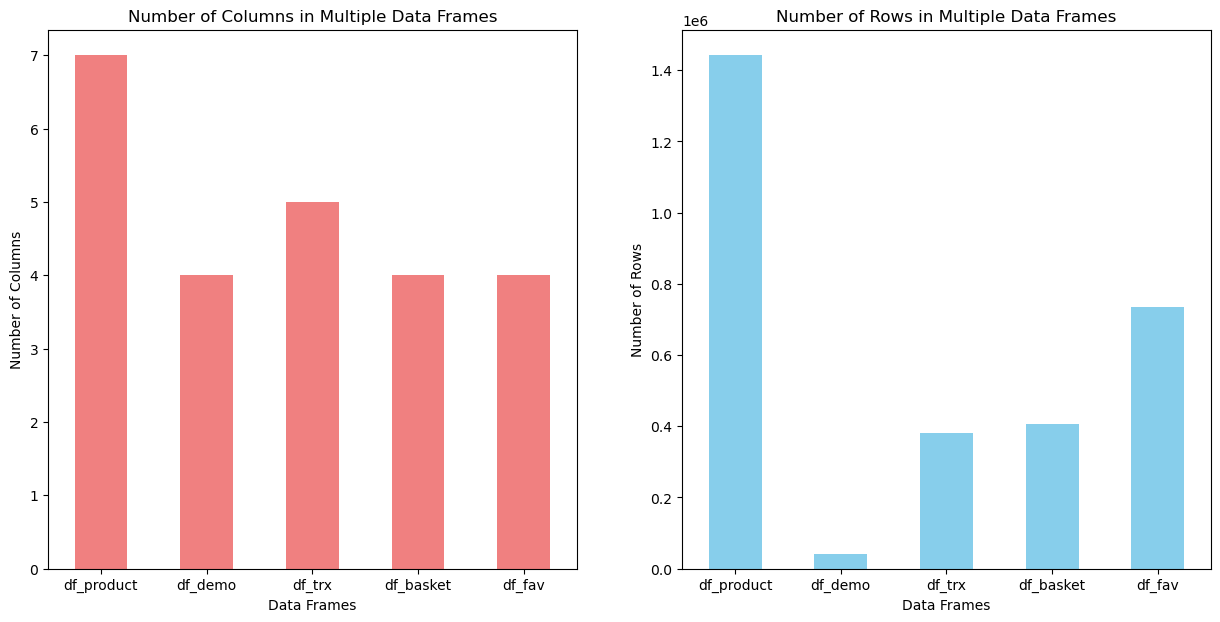

In [16]:
data_frames = [df_product, df_demo, df_trx, df_basket, df_fav]
data_frames_names = ["df_product", "df_demo", "df_trx", "df_basket", "df_fav"]

df_info = pd.DataFrame([(df.shape[0], df.shape[1]) for df in data_frames],
                       columns=['Rows', 'Columns'])

# Plotting for Number of Columns
fig, (ax_cols, ax_rows) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

df_info['Columns'].plot(kind='bar', ax=ax_cols, color='lightcoral')
ax_cols.set_xticklabels([f'{df}' for df in data_frames_names], rotation=0)
ax_cols.set_xlabel('Data Frames')
ax_cols.set_ylabel('Number of Columns')
ax_cols.set_title('Number of Columns in Multiple Data Frames')

# Plotting for Number of Rows
df_info['Rows'].plot(kind='bar', ax=ax_rows, color='skyblue')
ax_rows.set_xticklabels([f'{df}' for df in data_frames_names], rotation=0)
ax_rows.set_xlabel('Data Frames')
ax_rows.set_ylabel('Number of Rows')
ax_rows.set_title('Number of Rows in Multiple Data Frames')

#### df_product

df_product: Products' information data

- **contentid:** Unique ID given to the product.
- **currentbugroupname:** Business Group Name (can be thought of as a broader category) of the product.
- **brandid:** Unique ID given to the brand of the product.
- **gender:** Target gender group of the product.
- **age:** Target age group of the product.
- **title:** Title of the product.
- **categoryname:** Category name of the product.

In [3]:
df_product.head(10)

,contentid,currentbugroupname,brandid,gender,age,title,categoryname
0,40100964,Ayakkabı & Çanta,37787,Erkek,Yetişkin,Siyah Kauçuk Taban Büyük Numara Spor Ayakkab R...,Klasik Ayakkabı
1,40427970,Branded Tekstil,169,Kadın,Yetişkin,Kadın Siyah Çizgili Cepli Kuşaklı Pantolon,Pantolon
2,41026644,FMCG,20150,Unisex,Yetişkin,Color Growth Healt Formula (800-1200) 100gr Aç...,Akvaryum Balık Yemleri
3,41227029,Branded Tekstil,11806,Kadın,Yetişkin,Kadın Pamuk Paçalı Ribana Külot B005,Külot
4,40770080,Ev,2195,Unisex,Yetişkin,Suki - Sushi Seti 8 Parça,Tabak
5,32196943,GAS,366101,Erkek,Yetişkin,Erkek Eşofman Altı - S -,Spor Eşofman Altı
6,41767813,GM,17150,Unisex,Yetişkin,Hayati Inanç Can Veren Pervaneler Set 6 Kitap,Deneme - İnceleme
7,33011110,Branded Tekstil,877,Erkek,Yetişkin,Micro Dokuma Takım Elbise,Takım Elbise
8,41838807,Branded Tekstil,1220,Kadın,Yetişkin,V Yaka Bluz - Kiremit Çiçekli,Bluz
9,42791183,Branded Tekstil,710,Unisex,Yetişkin,Siyah Tek Kollu Askılı Uzun Abiye Elbise,Abiye & Mezuniyet Elbisesi


In [4]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441753 entries, 0 to 1441752
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   contentid           1441753 non-null  int64 
 1   currentbugroupname  1441753 non-null  object
 2   brandid             1441753 non-null  int64 
 3   gender              1220171 non-null  object
 4   age                 1130547 non-null  object
 5   title               1441165 non-null  object
 6   categoryname        1441753 non-null  object
dtypes: int64(2), object(5)
memory usage: 77.0+ MB


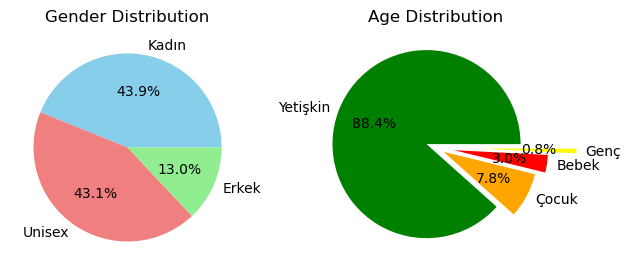

In [23]:
# create pie chart for the gender and age features separately. Compare the number of products. Please put the charts side by side.
# Create pie chart for the gender feature
gender_counts = df_product['gender'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Gender Distribution')

# Create pie chart for the age feature
age_counts = df_product['age'].value_counts()
explode = [0.1, 0.1, 0.2, 0.5]
plt.subplot(1, 2, 2)
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', colors=['green', 'orange', 'red', 'yellow'], explode=explode)
plt.title('Age Distribution')

# Adjust the layout to put the charts side by side
plt.tight_layout()

# Show the charts
plt.show()

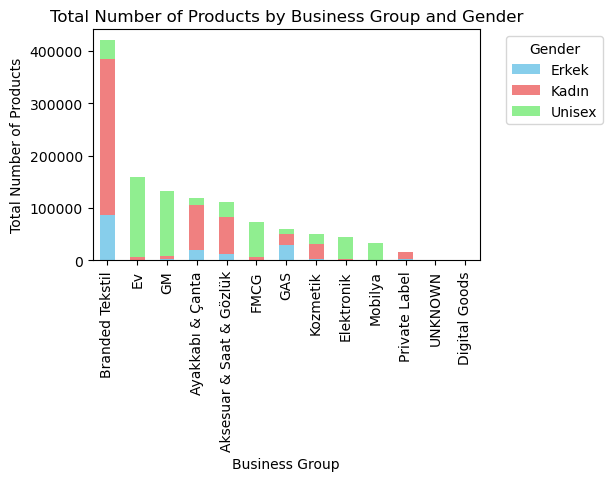

In [5]:
# Group by 'currentbugroupname' and 'gender' and get the count of products
grouped_data = df_product.groupby(['currentbugroupname', 'gender']).size().unstack()

# Calculate the total number of products for each business group
grouped_data['Total'] = grouped_data.sum(axis=1)

# Sort the DataFrame by the total number of products in descending order
grouped_data = grouped_data.sort_values(by='Total', ascending=False)

# Drop the 'Total' column for plotting
grouped_data = grouped_data.drop(columns='Total')

# Define a custom color palette for gender (including Unisex)
gender_palette = {'Erkek': 'skyblue', 'Kadın': 'lightcoral', 'Unisex': 'lightgreen'}

# Plot stacked bar chart with custom color palette
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(5, 3), color=[gender_palette[gender] for gender in grouped_data.columns])

# Customize the plot
ax.set_title('Total Number of Products by Business Group and Gender')
ax.set_xlabel('Business Group')
ax.set_ylabel('Total Number of Products')
ax.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

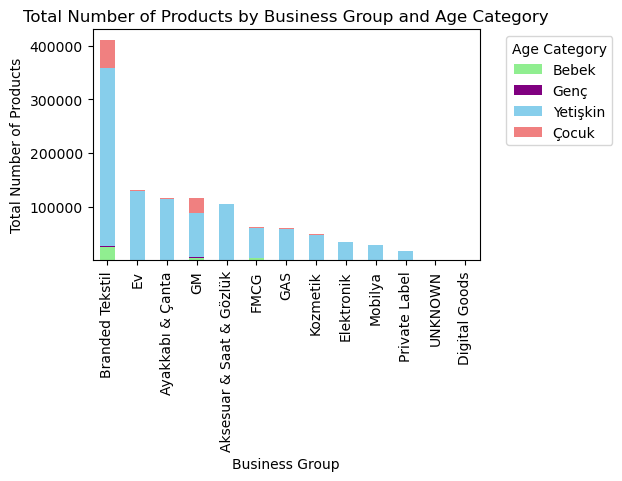

In [6]:
# Group by 'currentbugroupname' and 'gender' and get the count of products
grouped_data = df_product.groupby(['currentbugroupname', 'age']).size().unstack()

# Calculate the total number of products for each business group
grouped_data['Total'] = grouped_data.sum(axis=1)

# Sort the DataFrame by the total number of products in descending order
grouped_data = grouped_data.sort_values(by='Total', ascending=False)

# Drop the 'Total' column for plotting
grouped_data = grouped_data.drop(columns='Total')

# Define a custom color palette for gender (including Unisex)
gender_palette = {'Yetişkin': 'skyblue', 'Çocuk': 'lightcoral', 'Bebek': 'lightgreen', 'Genç': 'purple'}

# Plot stacked bar chart with custom color palette
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(5, 3), color=[gender_palette[gender] for gender in grouped_data.columns])

# Customize the plot
ax.set_title('Total Number of Products by Business Group and Age Category')
ax.set_xlabel('Business Group')
ax.set_ylabel('Total Number of Products')
ax.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [ ]:
if(False):
    from wordcloud import WordCloud
    from wordcloud import ImageColorGenerator
    from wordcloud import STOPWORDS
    # the problem here is that the words in the STOPWORDS are in English. However, we are interested in Turkish.
    text = " ".join(i for i in df_product.title.astype(str))
    stopwords = set(STOPWORDS)
    print(stopwords)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()



** Tasks

-- try to visualize the category names at some level (be aware of it's categorical but the number of unique members is high)

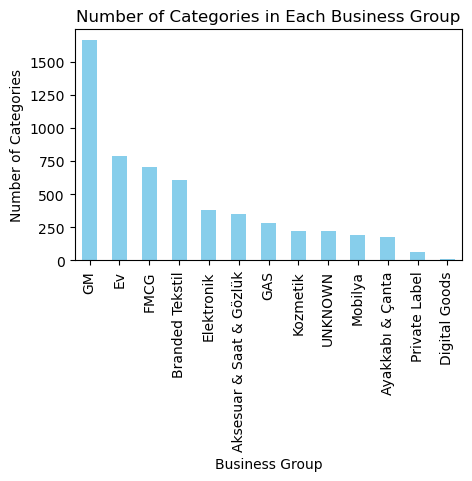

In [7]:
# I want to show how many categories we have in each currentbugroupname. Visualization for this
# Group by 'currentbugroupname' and count the number of unique categories
category_counts = df_product.groupby('currentbugroupname')['categoryname'].nunique()

category_counts_sorted = category_counts.sort_values(ascending=False)
# Plot the bar chart
ax = category_counts_sorted.plot(kind='bar', figsize=(5, 3), color='skyblue')
ax.set_title('Number of Categories in Each Business Group')
ax.set_xlabel('Business Group')
ax.set_ylabel('Number of Categories')

# Show the plot
plt.show()


In [9]:
v = df_product[df_product['currentbugroupname'] == "GM"]
print("number of business group name: ", v["categoryname"].nunique())
print()
print(v["categoryname"].unique())

number of business group name:  1661

['Deneme - İnceleme' 'Sınav Hazırlık' 'Masa Tenisi Raketi' ...
 'Cam Suyu Bidonu' 'Köpek Eğitim Ürünleri' 'Silindir Kapakları']


In [4]:
business_group_name = df_product["currentbugroupname"].unique()
for business_name in business_group_name:
    print("business group name", business_name)
    df = df_product[df_product["currentbugroupname"] == business_name]
    print(df[['currentbugroupname', 'gender', 'age', 'categoryname','title',]].groupby(['currentbugroupname' , 'gender', 'age']).nunique())
    print("###########################################################")


business group name Ayakkabı & Çanta
                                    categoryname  title
currentbugroupname gender age                          
Ayakkabı & Çanta   Erkek  Bebek                6     22
                          Genç                15     54
                          Yetişkin            81  12354
                          Çocuk               27    471
                   Kadın  Bebek               10     66
                          Genç                25    285
                          Yetişkin           105  54793
                          Çocuk               34    727
                   Unisex Bebek               18     87
                          Genç                15     94
                          Yetişkin           103  10731
                          Çocuk               29    766
###########################################################
business group name Branded Tekstil
                                    categoryname   title
currentbugroupname gender 

#### df_demo

 df_demo: Users' demographics data
- **userid:** Unique ID given to the user.
- **gender:** Specified gender of the user.
- **age:** Specified age of the user.
- **tenure:** membership age of the user.

In [8]:
df_demo.head(5)

,userid,gender,age,tenure
0,9798852,Bayan,41.0,89
1,11413556,Bayan,33.0,61
2,818188,Bayan,32.0,125
3,12049002,Bayan,30.0,54
4,10083038,Bayan,39.0,84


In [18]:
df_demo.shape

(40807, 4)

In [14]:
df_demo.describe()

,userid,age,tenure
count,4.080700e+04,25204.000000,40807.000000
mean,1.922032e+07,214.540351,41.772269
std,1.127785e+07,545.518265,39.807200
min,2.086000e+03,-48.000000,0.000000
25%,1.106792e+07,27.000000,11.000000
50%,1.753366e+07,35.000000,24.000000
75%,2.722423e+07,120.000000,66.000000
max,4.462565e+07,2019.000000,129.000000


In [15]:
na_ratios = df_demo.isna().mean()
print(na_ratios)

userid    0.000000
gender    0.000000
age       0.382361
tenure    0.000000
dtype: float64


<Axes: >

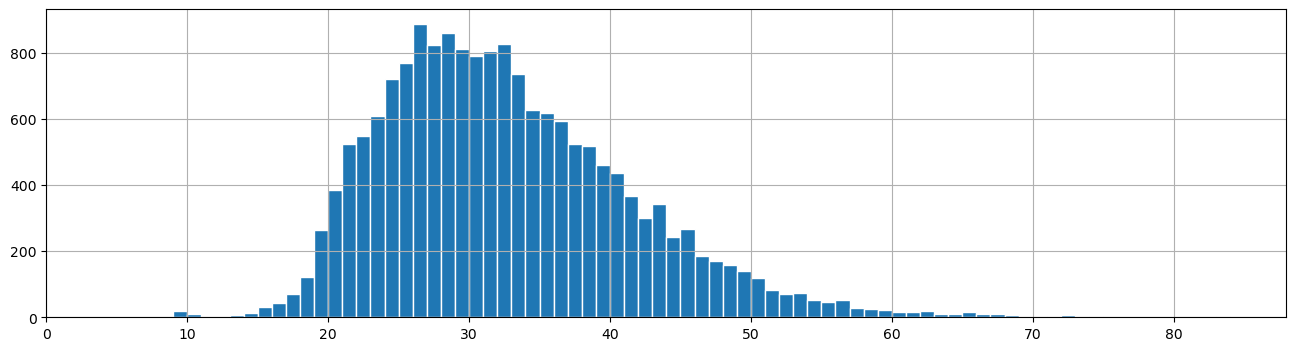

In [10]:
df_demo[(df_demo["age"] < 85) & (df_demo["age"] > 3)]["age"].hist(bins=80,figsize=(16,4),edgecolor = "white")

<Axes: >

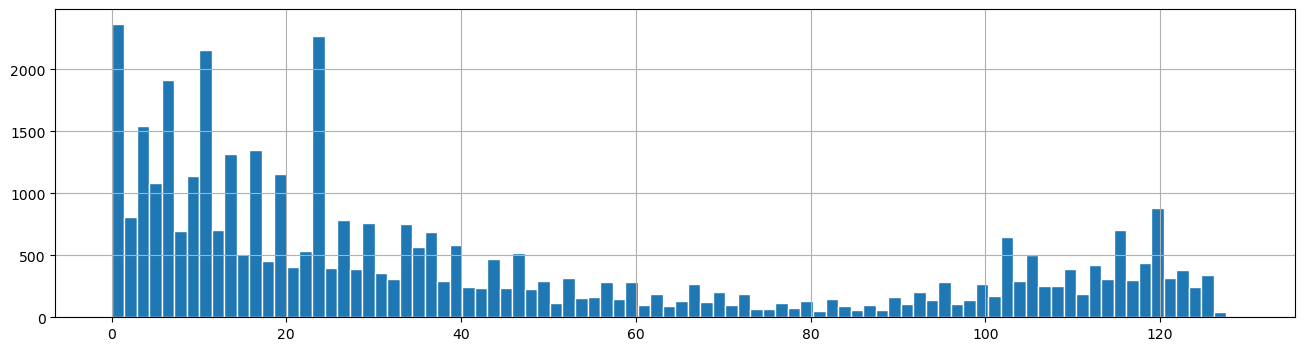

In [21]:
df_demo["tenure"].hist(bins=90,figsize=(16,4),edgecolor = "white")

/var/folders/ml/02dq9fd546x0bqn44knzdjr40000gn/T/ipykernel_1536/2835399550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo_processeed["age"] = df_demo_processeed["age"].astype("category")


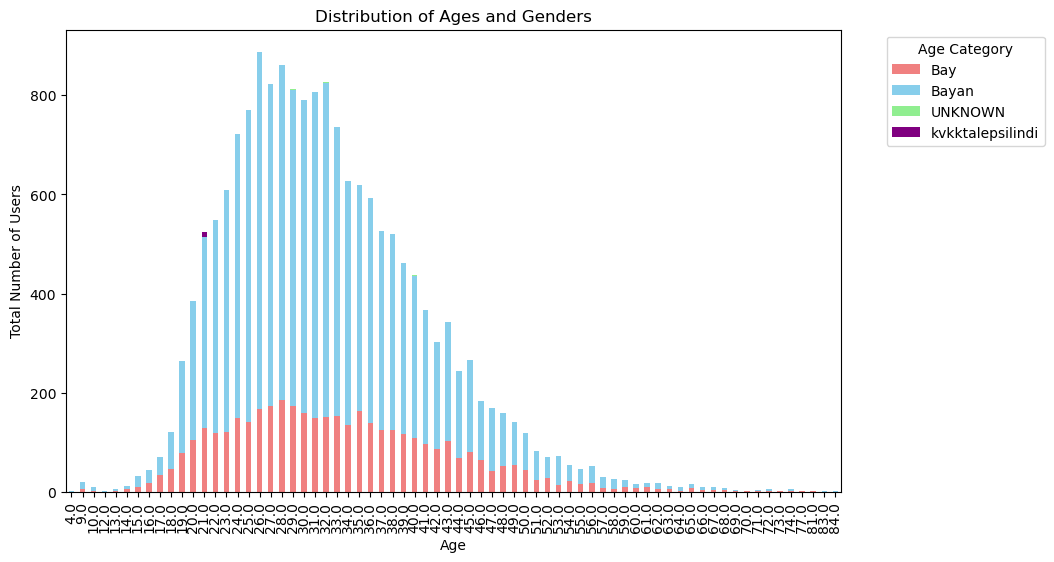

In [25]:
# change the age column type to categorical type and create a stacked bar chart to show the distribution of age and gender
df_demo_processeed = df_demo[(df_demo["age"] < 85) & (df_demo["age"] > 3)]
df_demo_processeed["age"] = df_demo_processeed["age"].astype("category")

grouped_data = df_demo_processeed.groupby(['age', 'gender']).size().unstack()

# Calculate the total number of products for each business group
grouped_data['Total'] = grouped_data.sum(axis=1)

# Drop the 'Total' column for plotting
grouped_data = grouped_data.drop(columns='Total')

# Define a custom color palette for gender (including Unisex)
gender_palette = {'Bayan': 'skyblue', 'Bay': 'lightcoral', 'UNKNOWN': 'lightgreen', 'kvkktalepsilindi': 'purple'}

# Plot stacked bar chart with custom color palette
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=[gender_palette[gender] for gender in grouped_data.columns])

# Customize the plot
ax.set_title('Distribution of Ages and Genders')
ax.set_xlabel('Age')
ax.set_ylabel('Total Number of Users')
ax.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()



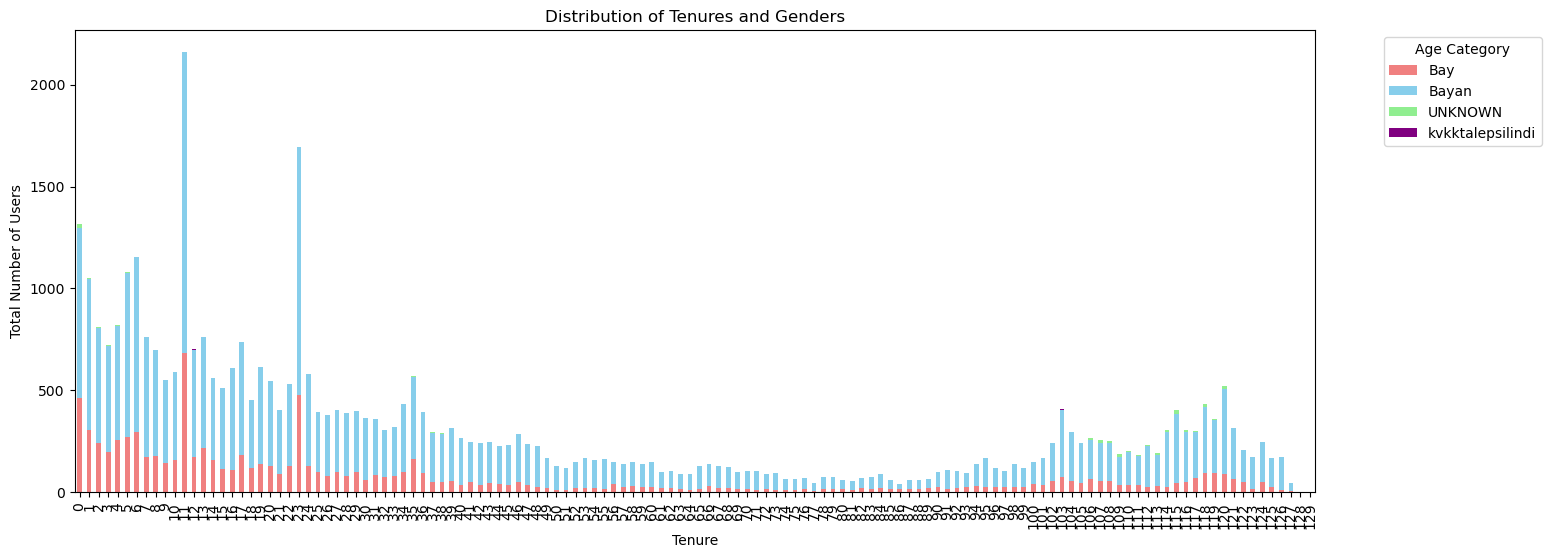

In [28]:
# change the age column type to categorical type and create a stacked bar chart to show the distribution of age and gender
df_demo_copied = df_demo.copy()
df_demo_copied["tenure"] = df_demo_copied["tenure"].astype("category")

grouped_data = df_demo_copied.groupby(['tenure', 'gender']).size().unstack()

# Calculate the total number of products for each business group
grouped_data['Total'] = grouped_data.sum(axis=1)

# Drop the 'Total' column for plotting
grouped_data = grouped_data.drop(columns='Total')

# Define a custom color palette for gender (including Unisex)
gender_palette = {'Bayan': 'skyblue', 'Bay': 'lightcoral', 'UNKNOWN': 'lightgreen', 'kvkktalepsilindi': 'purple'}

# Plot stacked bar chart with custom color palette
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(16, 6), color=[gender_palette[gender] for gender in grouped_data.columns])

# Customize the plot
ax.set_title('Distribution of Tenures and Genders')
ax.set_xlabel('Tenure')
ax.set_ylabel('Total Number of Users')
ax.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


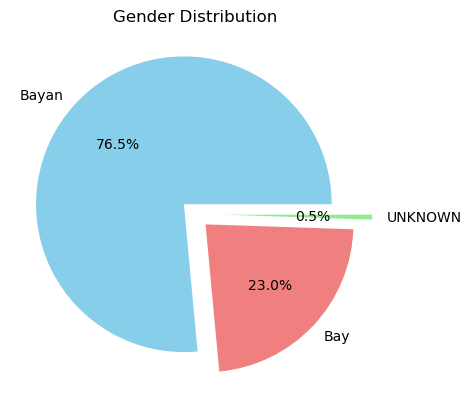

In [24]:
gender_counts = df_demo[df_demo["gender"] != "kvkktalepsilindi"]['gender'].value_counts() # there are really minor amount of "kvkktalepsilindi"
explode = (0.1, 0.1, 0.2)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'], explode=explode)
plt.title('Gender Distribution')
plt.show()

#### df_search_term

you may want to add a word cloud visualization here in order to gain deeper insight about users' search terms

In [7]:
df_search_term.head(5)

,userid,partition_date,search_term
0,29474088,2020-10-05,tum urunler
1,29474088,2020-10-07,nike
2,29474088,2020-10-07,hummel hmlkansas
3,29474088,2020-10-07,adidas superstar
4,29474088,2020-10-09,tum urunler


In [ ]:
print(df_search_term.shape)

In [8]:
df_search_term.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281753 entries, 0 to 1281752
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   userid          1281753 non-null  int64 
 1   partition_date  1281753 non-null  object
 2   search_term     1281752 non-null  object
dtypes: int64(1), object(2)
memory usage: 29.3+ MB


In [9]:
# convert object type to string in sf_search_term
df_search_term['search_term'] = df_search_term['search_term'].astype(str)

In [ ]:

comment_words = ''
#stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_search_term[:1000].search_term:
	
	# typecaste each val to string
	# val = str(val)

	# split the value
	#tokens = val.split()
	
	# Converts each token into lowercase
	#for i in range(len(val)):
	#	val[i] = ''.join(val[i].lower())
	
	comment_words += " ".join(val)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				#stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


#### df_trx

In [4]:
df_trx[df_trx["userid"] == 2086]

,userid,contentid,orderdate,quantity,price
53558,2086,1198661.0,2020-10-09 16:00:00.000,1,116.00
285958,2086,46096937.0,2020-10-07 13:00:00.000,1,59.90
305744,2086,49732421.0,2020-10-09 14:00:00.000,1,152.15
305896,2086,36518498.0,2020-10-09 14:00:00.000,1,42.43
307353,2086,49511010.0,2020-10-09 16:00:00.000,1,79.90
342026,2086,39687396.0,2020-10-07 13:00:00.000,2,187.06
342034,2086,31069133.0,2020-10-07 13:00:00.000,1,49.90


In [5]:
df_product[df_product["contentid"]==31069133]

,contentid,currentbugroupname,brandid,gender,age,title,categoryname
705902,31069133,Ev,42464,Unisex,Yetişkin,"Gri Renk,baskılı Çok Amaçlı Sepet // 42x31x25",Saklama Kutusu&Sepet&Hurç


df_trx: Users' product purchase data 
- **userid:** Unique ID of the user who has purchased the product.
- **contentid:** Unique ID of the product which has been purchased by the user.
- **orderdate:** Date and hour of the "product purchase" event.
- **quantity:** How many units of this product is purchased during this orderdate.
- **price:** Price of the purchased product.

In [6]:
df_trx.head(5)

,userid,contentid,orderdate,quantity,price
0,16049866,49489653.0,2020-10-31 03:00:00.000,1,199.95
1,14167874,42484094.0,2020-10-31 03:00:00.000,1,69.99
2,14167874,39373962.0,2020-10-31 03:00:00.000,1,69.99
3,13918576,32765999.0,2020-10-31 03:00:00.000,1,43.99
4,10323124,46471016.0,2020-10-31 03:00:00.000,1,58.32


In [7]:
na_ratios = df_trx.isna().mean()
print(na_ratios)

userid       0.000000
contentid    0.000029
orderdate    0.000000
quantity     0.000000
price        0.000000
dtype: float64


In [8]:
# removed rows with null values
df_trx = df_trx.dropna()

In [9]:
# show df_trx features types
df_trx.dtypes

userid         int64
contentid    float64
orderdate     object
quantity       int64
price        float64
dtype: object

In [10]:
df_trx["contentid"] = df_trx["contentid"].astype("int")

In [11]:
df_trx.head(5)

,userid,contentid,orderdate,quantity,price
0,16049866,49489653,2020-10-31 03:00:00.000,1,199.95
1,14167874,42484094,2020-10-31 03:00:00.000,1,69.99
2,14167874,39373962,2020-10-31 03:00:00.000,1,69.99
3,13918576,32765999,2020-10-31 03:00:00.000,1,43.99
4,10323124,46471016,2020-10-31 03:00:00.000,1,58.32


In [15]:
print(df_trx.shape)
min_date = df_trx.orderdate.min()
max_date = df_trx.orderdate.max()
print("min order date: ", min_date)
print("max order date: ", max_date)

(381525, 5)
min order date:  2020-10-01 04:00:00.000
max order date:  2020-11-01 03:00:00.000


In [13]:
df_trx_product = df_trx.merge(df_product, on='contentid', how='left')
df_trx_product.head(5)

,userid,contentid,orderdate,quantity,price,currentbugroupname,brandid,gender,age,title,categoryname
0,16049866,49489653,2020-10-31 03:00:00.000,1,199.95,Branded Tekstil,4951.0,Kadın,Yetişkin,Kadın Siyah Grafik Baskılı Kapüşonlu Sweatshirt,Sweatshirt
1,14167874,42484094,2020-10-31 03:00:00.000,1,69.99,Private Label,40.0,Kadın,Yetişkin,Lacivert Polo Yaka Triko Kazak,Kazak
2,14167874,39373962,2020-10-31 03:00:00.000,1,69.99,Private Label,40.0,Kadın,Yetişkin,Camel Crop ve İspanyol Kollu Triko Kazak,Kazak
3,13918576,32765999,2020-10-31 03:00:00.000,1,43.99,Ev,1222.0,Unisex,Yetişkin,Orva Paslanmaz Çelik Derin Sos Tenceresi - 12 cm,Tava&Tava Seti
4,10323124,46471016,2020-10-31 03:00:00.000,1,58.32,Private Label,40.0,Kadın,Yetişkin,Lila Kazayağı Ceket Gömlek,Gömlek


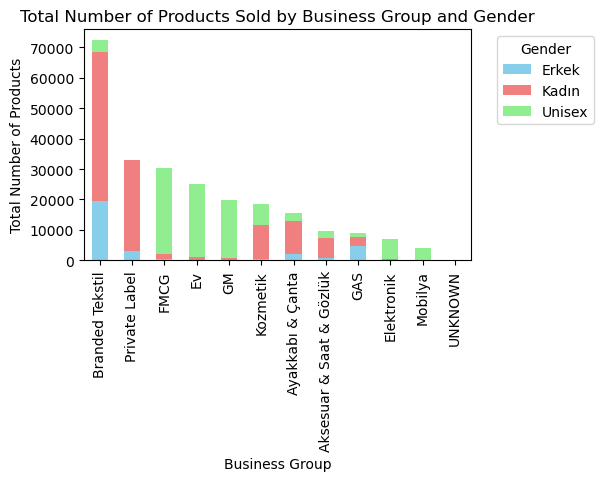

In [16]:
# Group by 'currentbugroupname' and 'gender' and get the count of products
grouped_data = df_trx_product.groupby(['currentbugroupname', 'gender']).size().unstack()

# Calculate the total number of products for each business group
grouped_data['Total'] = grouped_data.sum(axis=1)

# Sort the DataFrame by the total number of products in descending order
grouped_data = grouped_data.sort_values(by='Total', ascending=False)

# Drop the 'Total' column for plotting
grouped_data = grouped_data.drop(columns='Total')

# Define a custom color palette for gender (including Unisex)
gender_palette = {'Erkek': 'skyblue', 'Kadın': 'lightcoral', 'Unisex': 'lightgreen'}

# Plot stacked bar chart with custom color palette
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(5, 3), color=[gender_palette[gender] for gender in grouped_data.columns])

# Customize the plot
ax.set_title('Total Number of Products Sold by Business Group and Gender')
ax.set_xlabel('Business Group')
ax.set_ylabel('Total Number of Products')
ax.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

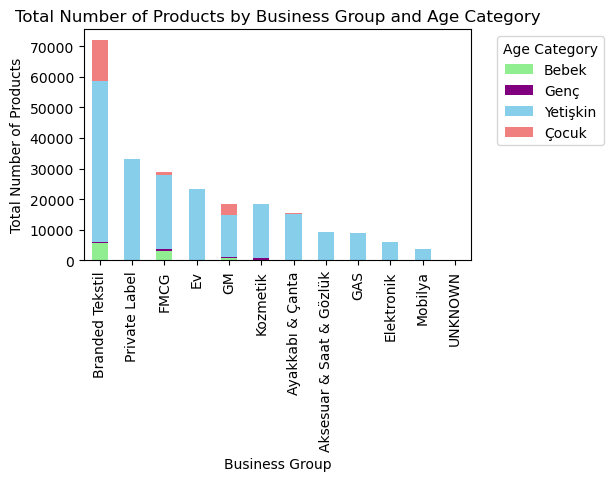

In [17]:
# Group by 'currentbugroupname' and 'gender' and get the count of products
grouped_data = df_trx_product.groupby(['currentbugroupname', 'age']).size().unstack()

# Calculate the total number of products for each business group
grouped_data['Total'] = grouped_data.sum(axis=1)

# Sort the DataFrame by the total number of products in descending order
grouped_data = grouped_data.sort_values(by='Total', ascending=False)

# Drop the 'Total' column for plotting
grouped_data = grouped_data.drop(columns='Total')

# Define a custom color palette for gender (including Unisex)
gender_palette = {'Yetişkin': 'skyblue', 'Çocuk': 'lightcoral', 'Bebek': 'lightgreen', 'Genç': 'purple'}

# Plot stacked bar chart with custom color palette
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(5, 3), color=[gender_palette[gender] for gender in grouped_data.columns])

# Customize the plot
ax.set_title('Total Number of Products by Business Group and Age Category')
ax.set_xlabel('Business Group')
ax.set_ylabel('Total Number of Products')
ax.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

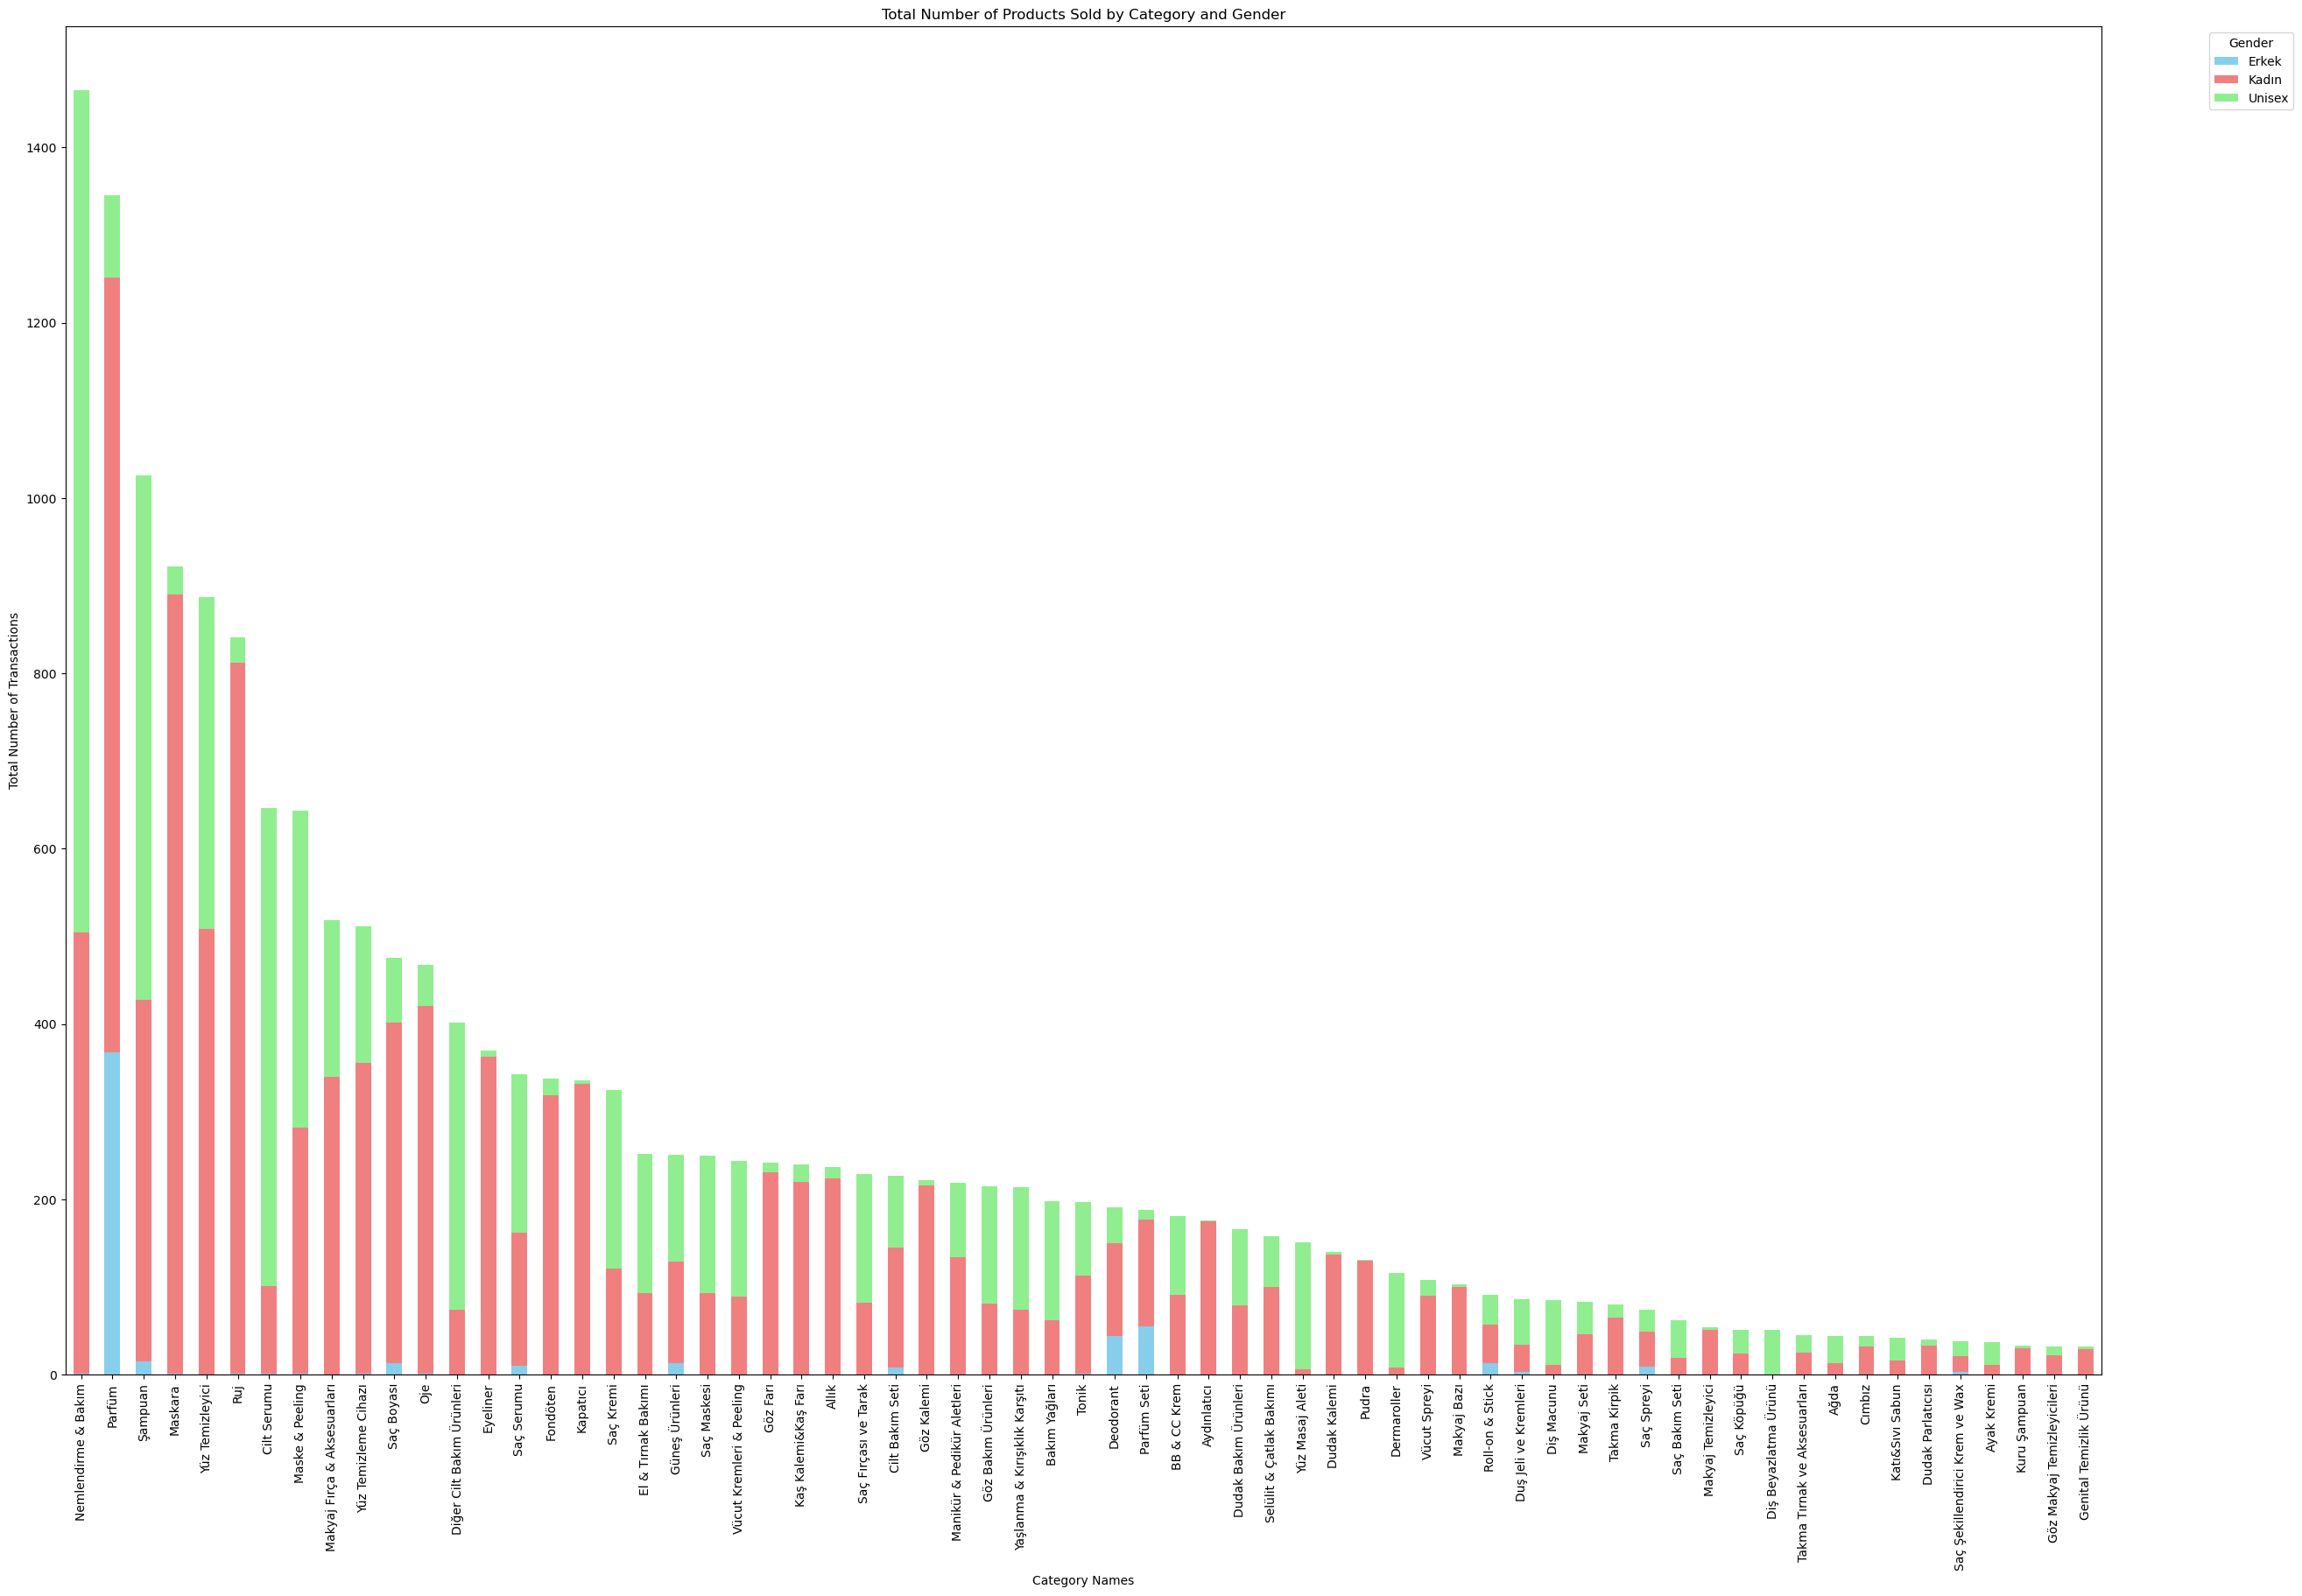

In [48]:
df_trx_product_gm =  df_trx_product[df_trx_product["currentbugroupname"]=="Kozmetik"]
grouped_data = df_trx_product_gm.groupby(["categoryname", "gender"]).size().unstack()

# Calculate the total number of products for each business group
grouped_data['Total'] = grouped_data.sum(axis=1)

# Sort the DataFrame by the total number of products in descending order
grouped_data = grouped_data[grouped_data['Total']>30]
grouped_data = grouped_data.sort_values(by='Total', ascending=False)

# Drop the 'Total' column for plotting
grouped_data = grouped_data.drop(columns='Total')

# Define a custom color palette for gender (including Unisex)
gender_palette = {'Erkek': 'skyblue', 'Kadın': 'lightcoral', 'Unisex': 'lightgreen'}

# Plot stacked bar chart with custom color palette
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(30, 20), color=[gender_palette[gender] for gender in grouped_data.columns])

# Customize the plot
ax.set_title('Total Number of Products Sold by Category and Gender')
ax.set_xlabel('Category Names')
plt.xticks(fontsize=10)
ax.set_ylabel('Total Number of Transactions')
ax.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [4]:
df_trx['orderdate'] = pd.to_datetime(df_trx['orderdate'])

In [13]:
# I need to divide orderdate column of df_trx into two parts; data and time:
df_trx["year"] = df_trx["orderdate"].dt.year
df_trx["month"] = df_trx["orderdate"].dt.month
df_trx["day"] = df_trx["orderdate"].dt.day
df_trx["hour"] = df_trx["orderdate"].dt.hour

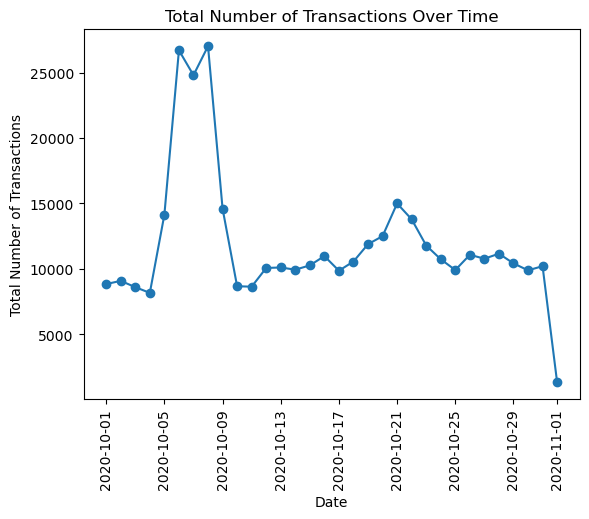

In [5]:
transactions_counts = df_trx.groupby(df_trx['orderdate'].dt.date).size()
plt.plot(transactions_counts.index, transactions_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Total Number of Transactions')
plt.title('Total Number of Transactions Over Time')
plt.xticks(rotation=90)
plt.show()

#### df_basket

df_basket: Users' add to basket data
- **userid:** Unique ID of the user who has added the product to his/her basket. 
- **contentid:** Unique ID of the product which has been added to the basket by the user.
- **partition_date:** Date and hour of the "add to basket" event.
- **addtobasket_count:** How many times this event occured during this partition_date.

In [25]:
print(df_basket.shape)
min_date = df_basket.partition_date.min()
max_date = df_basket.partition_date.max()
print("min order date: ", min_date)
print("max order date: ", max_date)

(406268, 4)
min order date:  2020-10-01 03:00:00.000
max order date:  2020-10-31 03:00:00.000


In [23]:
df_basket.head(5)

,userid,contentid,partition_date,addtobasket_count
0,42366578,41474373,2020-10-31 03:00:00.000,1
1,35956834,43278838,2020-10-31 03:00:00.000,1
2,26139571,31714898,2020-10-31 03:00:00.000,2
3,3262246,47879560,2020-10-31 03:00:00.000,1
4,20056671,44746302,2020-10-31 03:00:00.000,1


#### df_fav

df_fav: Users' add to favorite data
- **userid:** Unique ID of the user who has added the product to his/her favorites.
- **contentid:** Unique ID of the product which has been added to the favorites by the user.
- **partition_date:** Date and hour of the "add to favorites" event.
- **fav_count:** How many times this event occured during this partition_date.

In [28]:
print(df_fav.shape)
min_date = df_fav.partition_date.min()
max_date = df_fav.partition_date.max()
print("min order date: ", min_date)
print("max order date: ", max_date)

(733827, 4)
min order date:  2020-10-01 03:00:00.000
max order date:  2020-10-31 03:00:00.000


In [29]:
df_fav.head(5)

,userid,contentid,partition_date,fav_count
0,17627638,32509331,2020-10-02 03:00:00.000,1
1,7757008,31759112,2020-10-08 03:00:00.000,1
2,7757008,53750743,2020-10-31 03:00:00.000,1
3,7757008,6508034,2020-10-14 03:00:00.000,1
4,7757008,31437207,2020-10-20 03:00:00.000,1


## Funnel Analysis

### Steps

Funnel steps based on the user journey

1) Product Visit (Awareness)
2) Add to Basket (Interest)
3) Add to Favorites (Consideration)
4) Product Purchase (Conversion)

df_visit, df_basket, df_fav, and df_trx can be used respectivelly for the analysis.

Note that the period we are interested in matters some!

In [5]:
print("df_visit shape: ",df_visit.shape)
print("df_fav shape: ",df_fav.shape)
print("df_basket shape: ",df_basket.shape)
print("df_trx shape: ",df_trx.shape)

df_visit shape:  (14389920, 4)
df_fav shape:  (733827, 4)
df_basket shape:  (406268, 4)
df_trx shape:  (381536, 5)


### Conversion Rates

We need to calculate the percentage of users who moved from one step to the next. These values are called conversion rates.

!
In order to calculate conversion rates from one step to another, inner join approach has been employed. Note that we are interested in not only userid but also contentid. For example, a customer may add multiple items into its basket but a purchase has been made for just one item. The items that haven't been purchased is ignored in the conversion rate calculation.
!

In [3]:
def calculate_conversion_rate(df_from, df_to):
    
    merged_df = pd.merge(df_from, df_to, on=['userid', 'contentid'], how='inner')

    # Calculate the percentage of matched pairs
    conversion_rate = (len(merged_df) / len(df_from)) * 100
    # print(f"The percentage of userid and contentid pairs matched in both tables: {conversion_rate:.2f}%")

    return conversion_rate

In [6]:
print("Conversion rate from df_visit to df_basket: ",calculate_conversion_rate(df_visit, df_basket) )
print("Conversion rate from df_visit to df_fav: ",calculate_conversion_rate(df_visit, df_fav) )
print("Conversion rate from df_basket to df_trx: ",calculate_conversion_rate(df_basket, df_trx) )
print("Conversion rate from df_fav to df_trx: ",calculate_conversion_rate(df_fav, df_trx) )

Conversion rate from df_visit to df_basket:  0.030146102271590116
Conversion rate from df_visit to df_fav:  6.18893642216218
Conversion rate from df_basket to df_trx:  0.4359191469670267
Conversion rate from df_fav to df_trx:  0.4359191469670267


## Propensity Score Prediction

### df_target_train

In [4]:
df_target_train.head(5)

,userid,currentbugroupname
0,28704634,GM
1,13506108,Ev
2,5893128,NaN
3,15209082,Mobilya
4,1109976,Kozmetik


In [6]:
df_target_train = df_target_train.sort_values(by='userid')
df_target_train.head(10)

,userid,currentbugroupname
11399,2086,Ayakkabı & Çanta
11400,2086,Private Label
19014,12810,Ayakkabı & Çanta
19015,12810,Private Label
21676,14302,NaN
13918,15148,Kozmetik
13919,15148,FMCG
23266,32508,Ayakkabı & Çanta
13580,33614,Branded Tekstil
6511,38206,Kozmetik


In [9]:
print(df_target_train.shape)
print(df_target_train["userid"].nunique())

(27086, 2)
20402


In [33]:
print(df_target_train["currentbugroupname"].unique())

['GM' 'Ev' nan 'Mobilya' 'Kozmetik' 'Aksesuar & Saat & Gözlük'
 'Private Label' 'FMCG' 'Ayakkabı & Çanta' 'GAS' 'Branded Tekstil'
 'Elektronik' 'Digital Goods']


In [6]:
# total number of currentbugroupname of each userid
df_target_train.groupby('userid')['currentbugroupname'].nunique()

userid
2086        2
12810       2
14302       0
15148       2
32508       1
           ..
44419648    1
44425523    0
44429700    1
44445582    0
44625651    0
Name: currentbugroupname, Length: 20402, dtype: int64

In [27]:
df_target_train.sort_values(by='userid')

,userid,currentbugroupname
11399,2086,Ayakkabı & Çanta
11400,2086,Private Label
19014,12810,Ayakkabı & Çanta
19015,12810,Private Label
21676,14302,NaN
...,...,...
17198,44419648,Ayakkabı & Çanta
574,44425523,NaN
24784,44429700,Elektronik
13931,44445582,NaN


### df_test

In [12]:
df_test.head(5)

,userid,currentbugroupname,probability,target
0,20152944,Private Label,NaN,NaN
1,6662068,Private Label,NaN,NaN
2,11941706,Private Label,NaN,NaN
3,12406170,Private Label,NaN,NaN
4,20939786,Private Label,NaN,NaN


In [10]:
print(df_test.shape)
print(df_test["userid"].nunique())

(244836, 4)
20403


In [5]:
df_test.sort_values(by='userid')

,userid,currentbugroupname,probability,target
137114,23198,GM,NaN,NaN
35099,23198,Kozmetik,NaN,NaN
157517,23198,FMCG,NaN,NaN
177920,23198,Mobilya,NaN,NaN
198323,23198,GAS,NaN,NaN
...,...,...,...,...
63897,44621771,Branded Tekstil,NaN,NaN
206718,44621771,Aksesuar & Saat & Gözlük,NaN,NaN
104703,44621771,Elektronik,NaN,NaN
2688,44621771,Private Label,NaN,NaN


In [7]:
df_test.groupby('userid')['currentbugroupname'].nunique()

userid
23198       12
25005       12
27076       12
27860       12
28742       12
            ..
44468159    12
44476843    12
44476894    12
44611269    12
44621771    12
Name: currentbugroupname, Length: 20403, dtype: int64

1.0000490148024703
